C:\ProgramData\Anaconda3\envs\tf_V2\lib\site-packages\keras\datasets\reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\envs\tf_V2\lib\site-packages\keras\datasets\reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])
C:\ProgramData\Anaconda3\envs\tf_V2\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of 

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 25s 3ms/step - loss: 2.6730 - accuracy: 0.3449 - val_loss: 2.4084 - val_accuracy: 0.3620
Epoch 2/20
8982/8982 [==============================] - 22s 2ms/step - loss: 2.1343 - accuracy: 0.4597 - val_loss: 1.9951 - val_accuracy: 0.5022
Epoch 3/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.8967 - accuracy: 0.5120 - val_loss: 1.8296 - val_accuracy: 0.5508
Epoch 4/20
8982/8982 [==============================] - 22s 2ms/step - loss: 1.7516 - accuracy: 0.5466 - val_loss: 1.7379 - val_accuracy: 0.5494
Epoch 5/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.7104 - accuracy: 0.5537 - val_loss: 1.7836 - val_accuracy: 0.5263
Epoch 6/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.6543 - accuracy: 0.5747 - val_loss: 1.6557 - val_accuracy: 0.5788
Epoch 7/20
8982/8982 [==============================] - 22s 3ms/step - loss: 1.575

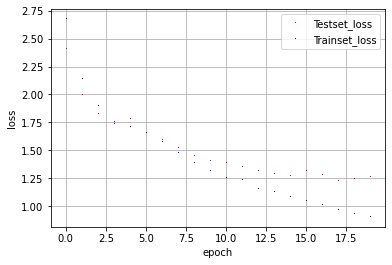

In [17]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=1000,test_split=0.2)
x_train = pad_sequences(x_train,100)
x_test = pad_sequences(x_test,100)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation = 'tanh'))
model.add(Dense(46,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 20, verbose = 1, batch_size = 128, validation_data = (x_test,y_test))

y_valloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_valloss,'-',c='red',label = 'Testset_loss')
plt.plot(x_len,y_loss,'-',c='blue',label = 'Trainset_loss')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

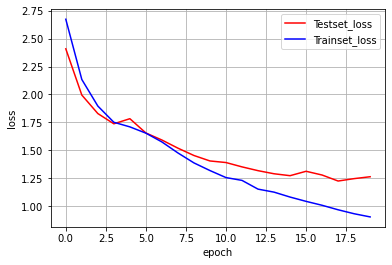

In [18]:
plt.plot(x_len,y_valloss,'-',c='red',label = 'Testset_loss')
plt.plot(x_len,y_loss,'-',c='blue',label = 'Trainset_loss')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()